In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression

from plots import plot_features_scores
from transformers import SelectKBestTransformer, SelectFromModelTransformer
from paths import RAW_DIR, STAGE_DIR

In [3]:
data = pd.read_csv(RAW_DIR / 'heart_disease.csv')

In [4]:
FEATURES = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
    'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
    'Education', 'Income']
TARGET = 'HeartDiseaseorAttack'

X = data[FEATURES]
y = data[TARGET]

# Univariate selection

In [15]:
selection_all = SelectKBestTransformer(mutual_info_classif, k=10)
selection_all.fit(X, y)
X_univariate = selection_all.transform(X)

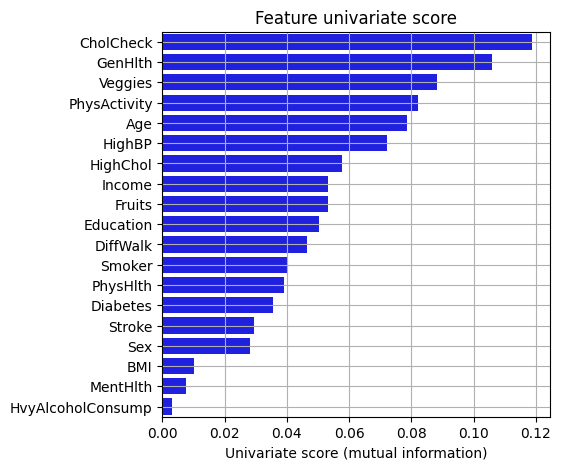

In [14]:
scores = selection_all.scores_
plot_features_scores(X, scores, metric_label='mutual information', figsize=(5, 5))

In [39]:
data_univariate = pd.concat([X_univariate, data[TARGET]], axis=1)

# Multivariate selection

In [5]:
lasso_selector = LogisticRegression(penalty='l1', solver='liblinear')
lasso_selector = SelectFromModelTransformer(
    lasso_selector, max_features=10).fit(X, y)
X_lasso = lasso_selector.transform(X)

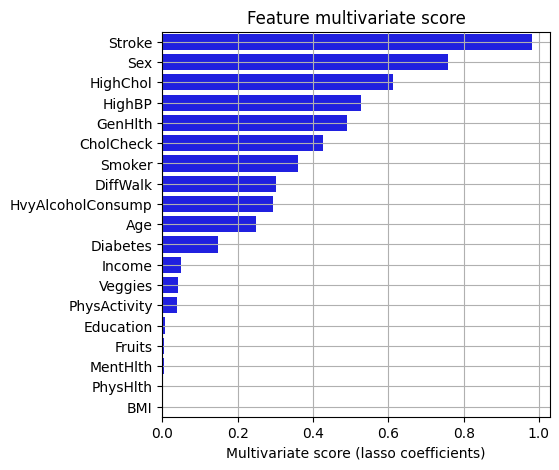

In [6]:
scores = np.abs(lasso_selector.estimator_.coef_.flatten())
plot_features_scores(X, scores, method='multivariate', metric_label='lasso coefficients', figsize=(5, 5))

In [41]:
data_multivariate = pd.concat([X_lasso, data[TARGET]], axis=1)

# Save feature selection

In [45]:
data_univariate.to_parquet(STAGE_DIR / 'selection' / 'univariate.parquet')
data_multivariate.to_parquet(STAGE_DIR / 'selection' / 'multivariate.parquet')